In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [16]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'],test_size = 0.33, random_state=0)

In [20]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [21]:
clf.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [22]:
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [23]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.92


[Text(133.92000000000002, 181.2, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 108.72, 'petal length (cm) <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

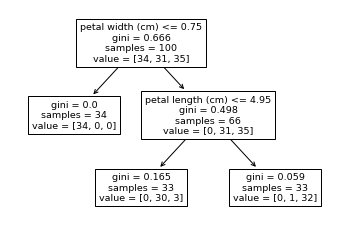

In [24]:
from sklearn import tree
tree.plot_tree(clf,max_depth=3,feature_names=data.feature_names)

In [25]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

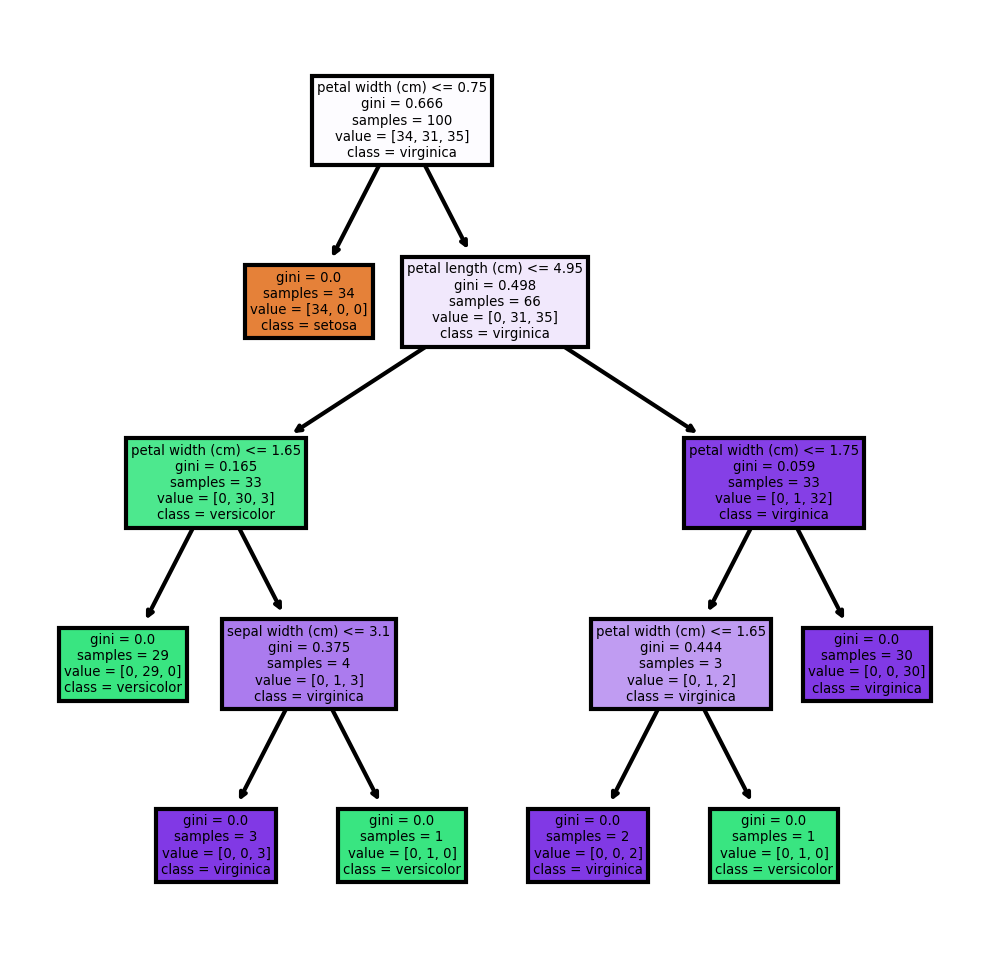

In [27]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('imagename.png')

In [28]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.595
2,petal length (cm),0.383
1,sepal width (cm),0.023
0,sepal length (cm),0.000


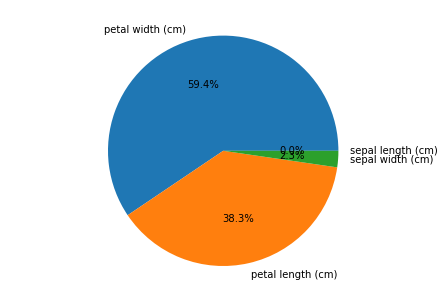

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
features = list(importances.feature.values)
imp_values = list(importances.importance.values)
ax.pie(imp_values, labels = features,autopct='%1.1f%%')
plt.show()

In [31]:
importances.feature.values

array(['petal width (cm)', 'petal length (cm)', 'sepal width (cm)',
       'sepal length (cm)'], dtype=object)